# 🔍🚗  Decision Tree Classifier machine learning algorithm to predict the safety of the car (unacceptable, acceptable,good , very good) with Python

### Problem Statement

A car dealership and manufacturing company wants to develop a predictive model to automatically evaluate the safety level of 

vehicles based on their key attributes.

Currently, safety assessments require expensive crash tests and expert evaluations, which are time-consuming and resource-intensive.

### Business Impact

The inability to quickly and accurately assess vehicle safety leads to:

Increased costs from extensive physical testing

Slower time-to-market for new vehicle models

Inconsistent safety evaluations due to subjective human judgment

Missed opportunities to optimize vehicle designs for safety early in development

HERE  we build a Decision Tree Classifier to predict the safety of the car. We build two models, one with criterion `gini index` 

and another one with criterion `entropy`. Implemention Decision Tree Classification with Python and Scikit-Learn. 

#  Import libraries 

In [1]:
import numpy as np # 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_evaluation.csv', header=None)

### View top 5 rows of dataset

In [3]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


###  Exploratory data analysis
Now, Let us explore the data to gain insights about the data. 

### view dimensions of dataset

In [4]:
df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### Rename column names
We can see that the dataset does not have proper column names. 

The columns are merely labelled as 0,1,2.... and so on. 

We should give proper names to the columns. We will do it as follows:-

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

### let's again preview the dataset

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

In [7]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, We will check the frequency counts of categorical variables.

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())   


vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables
- There are 7 variables in the dataset. All the variables are of categorical data type.
- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.
- `class` is the target variable.

### Explore `class` (Target) variable

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [11]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

### Declare feature vector and target variable

In [12]:
X = df.drop(['class'], axis=1) # 1 means column
y = df['class']

In [13]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [14]:
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### Split data into separate training and test set

In [15]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [17]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [18]:
# check the shape of X_train and X_test
y_train.shape, y_test.shape

((1157,), (571,))

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


#  Feature Engineering 
**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. We will carry out feature engineering on different types of variables.


First, We will check the data types of variables again.

In [20]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [22]:
 !pip install category-encoders

In [23]:
# import category encoders
import category_encoders as ce

In [24]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons',
                                  'lug_boot', 'safety'])

In [25]:
# OrdinalEncoder from category_encoders converts categorical features to numerical values 
# while preserving ordinal relationships.

In [26]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [27]:
X_train = encoder.fit_transform(X_train)

# fit_transform() on Training Data:

# Learning Phase: Analyzes categorical features in X_train to create mapping rules
# (e.g., "vhigh"→1, "high"→2 for the 'buying' column)

# Transformation: Immediately applies these rules to convert training data to numerical values

# Critical for preventing data leakage - encoding rules must come ONLY from training data



In [28]:
X_test = encoder.transform(X_test)

# transform() on Test Data:

# Consistent Encoding: Uses the already-learned rules from training data

# No Peeking: Avoids biasing the

In [29]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [30]:
X_train.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
dtype: object

In [31]:
y_train.head()

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
Name: class, dtype: object

In [32]:
y_train.head()

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
Name: class, dtype: object

We now have training and test set ready for model building. 

###  Decision Tree Classifier with criterion gini index

In [33]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [34]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

# criterion='gini': Uses Gini impurity to measure split quality 

# other alternative is 'entropy'

# max_depth=3: Limits tree depth to prevent overfitting


# Root (Depth 0)  
# ├── Branch (Depth 1)  
# │   ├── Leaf (Depth 2)  
# │   └── Branch (Depth 2)  
# │       └── Leaf (Depth 3)  
# └── ... 

In [35]:
# # random_state=0: Ensures reproducible results

# random_state Why use 0 ?

# Ensures anyone running your code gets identical results

# Critical for debugging and sharing reproducible work

# If set to None:

# Results vary slightly between runs

# Not recommended for production unless you want variability

In [36]:
# fit the model

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [37]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [38]:
y_pred_gini[:10]

array(['unacc', 'good', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score
print('Model accuracy with  gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy with  gini index: 0.8441


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Let us  compare the train-set and test-set accuracy to check for overfitting.

In [40]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'good'],
      dtype=object)

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8539


### Check for overfitting and underfitting

In [42]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8539
Test set score: 0.8441


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

In [43]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [44]:
y_train

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class, Length: 1157, dtype: object

[Text(0.5, 0.9, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.625, 0.7, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.5, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.25, 0.3, 'x[1] <= 2.5\ngini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.125, 0.1, 'gini = 0.259\nsamples = 131\nvalue = [20, 0, 111, 0]'),
 Text(0.375, 0.1, 'gini = 0.382\nsamples = 140\nvalue = [104, 0, 36, 0]'),
 Text(0.75, 0.3, 'x[1] <= 2.5\ngini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.625, 0.1, 'gini = 0.442\nsamples = 129\nvalue = [92, 0, 27, 10]'),
 Text(0.875, 0.1, 'gini = 0.688\nsamples = 125\nvalue = [39, 49, 7, 30]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

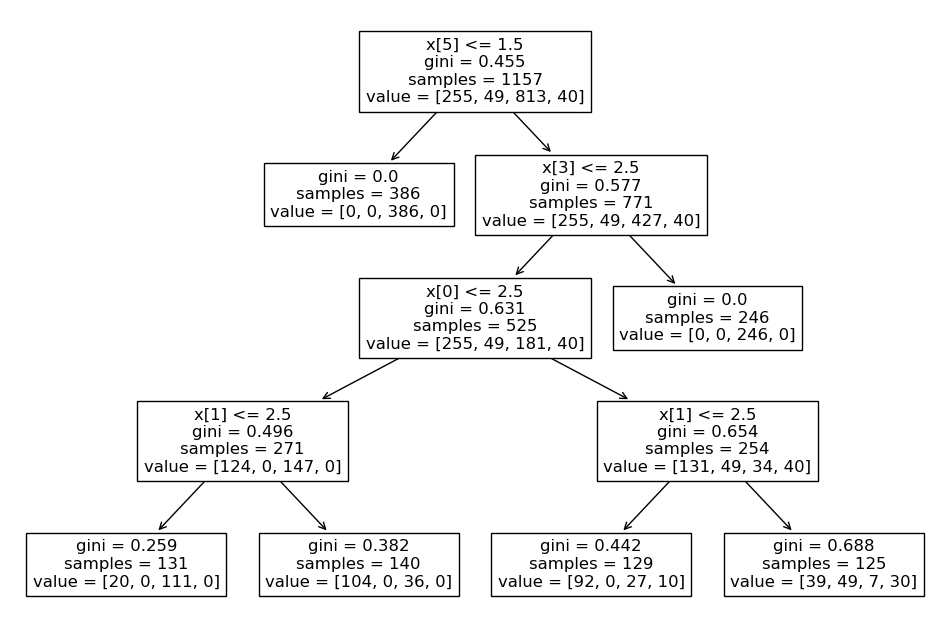

In [45]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [46]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [47]:
y_test.head()

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
Name: class, dtype: object

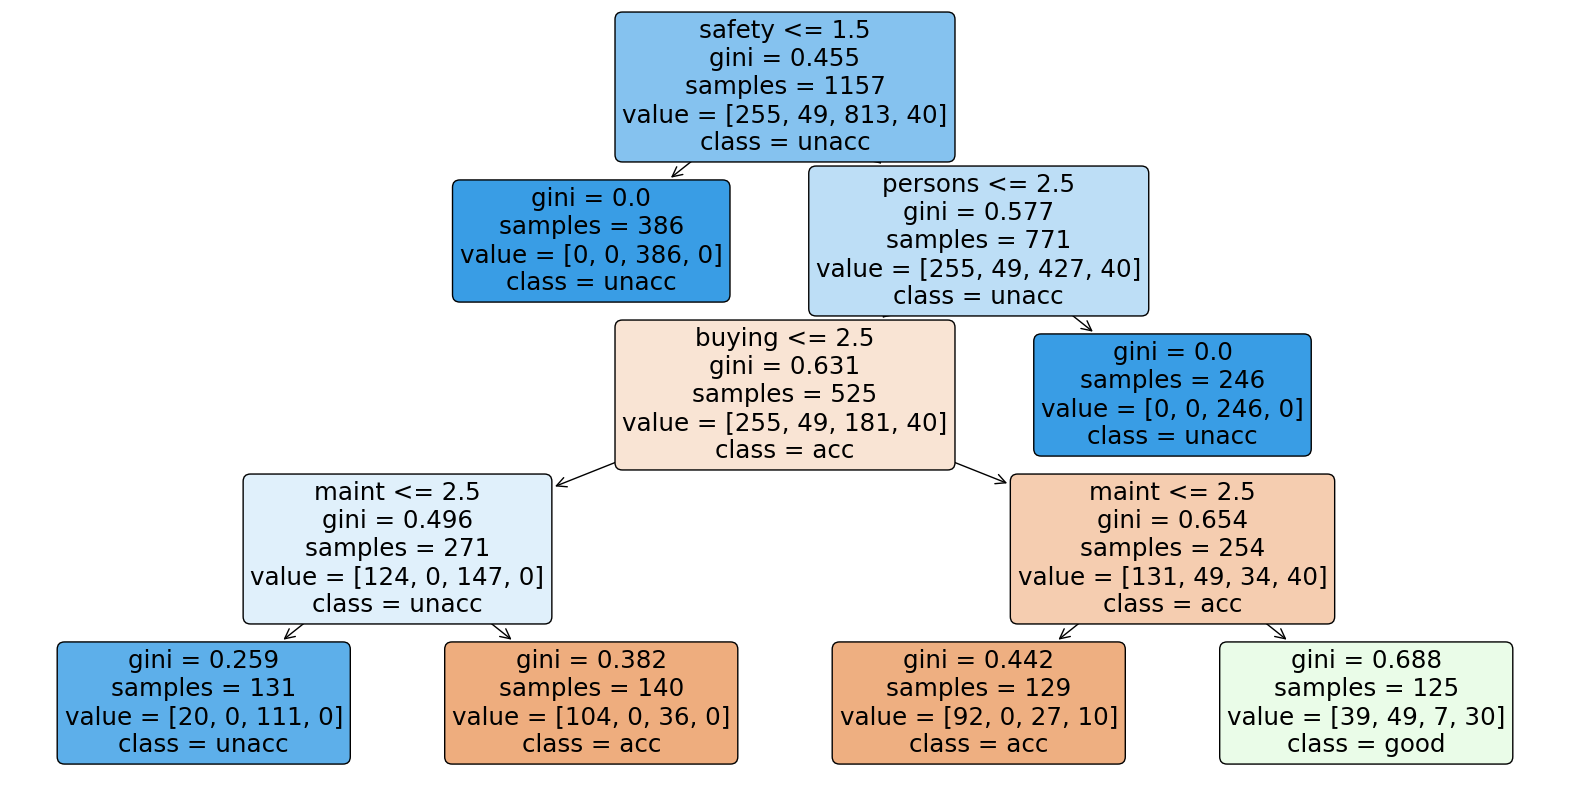

In [48]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=X.columns, class_names=clf_gini.classes_, filled=True, rounded=True)
plt.show()

In [49]:
# Class Order Mapping:
# Index 0: 'acc' (acceptable) → 124 samples

# Index 1: 'good' → 0 samples

# Index 2: 'unacc' (unacceptable) → 147 samples (majority class)

# Index 3: 'vgood' (very good) → 0 samples

# Decision Tree Classifier with criterion entropy

In [50]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [51]:
# Entropy vs Gini:
# - Both measure node impurity (lower = better split)
# - Entropy: Uses log(math) → slightly slower but more sensitive
# - Gini: Simpler/faster → usually similar results
# (Try both and compare accuracy!)

### Predict the Test set results with criterion entropy

In [52]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [53]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [54]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [56]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

In [60]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [62]:
y_test.head()

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
Name: class, dtype: object

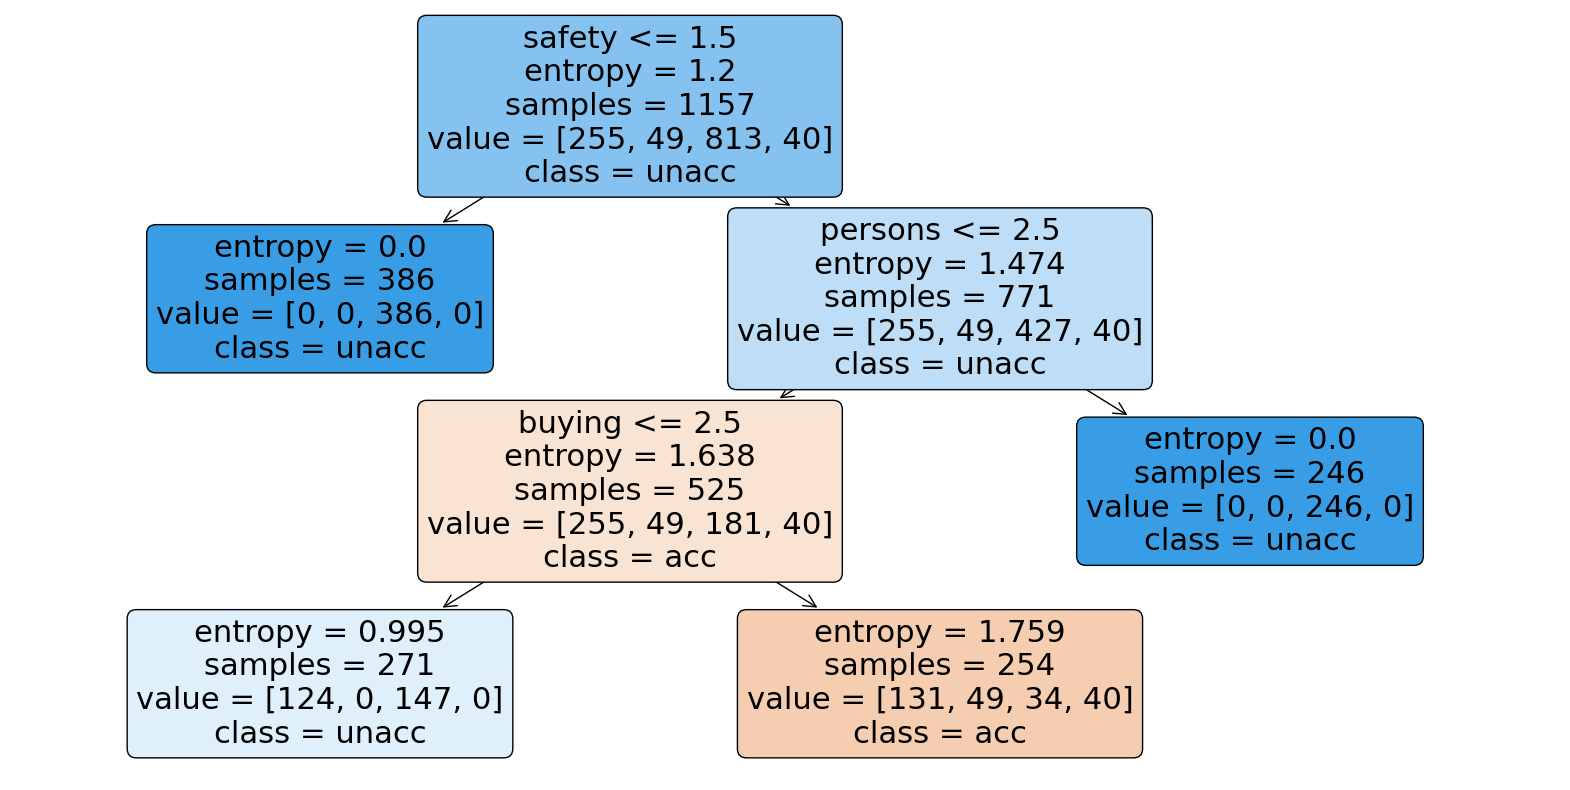

In [57]:
from sklearn.tree import  plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_en.fit(X_train, y_train), 
          feature_names=X.columns,  # This shows column names instead of indices
          class_names=clf_en.classes_,  # Shows class names if available
          filled=True,              # Colors the nodes
          rounded=True)             # Rounds the node corners
plt.show()

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

#  Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. 

A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. 

The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [58]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


# ** Classification Report**

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



🔴 Model struggles with minority classes (good, vgood)

🟢 Excels at 'unacc' (majority class - 97% recall)

⚠️ 0% scores mean no correct predictions for that class

🤖 Weighted avg (80%) matters most for imbalanced data

 Summary of Model Performance
 
✅ What’s working:

The model excels at identifying "unacc" (unacceptable) cars:

97% recall: Captures almost all unsafe cars (critical for safety screening)

87% precision: When it predicts "unacc", it’s usually correct

⚠️ Key Limitations:

Fails on rare classes:

"good" and "vgood" predictions are 0% accurate

Due to very few samples (20 and 25 in test set)

📈 Recommended Actions:

For immediate use: Deploy for filtering unsafe cars only (high reliability on "unacc")

Improvement options:

Collect more data for rare classes ("good"/"vgood")

Use techniques like class weighting or oversampling

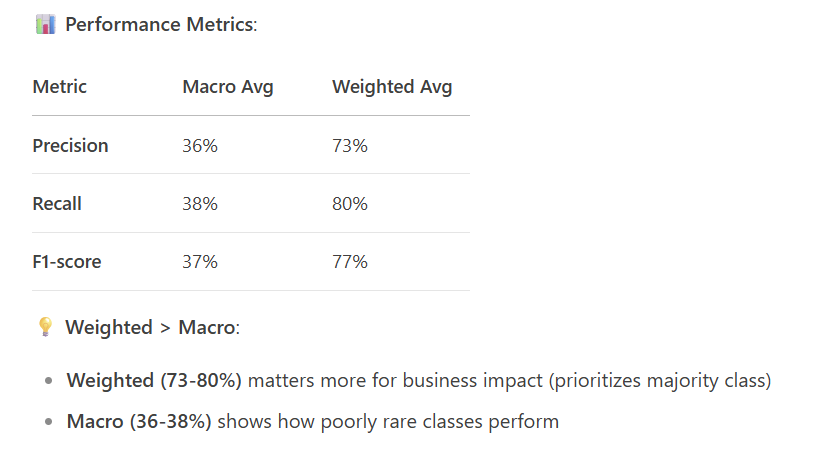

#  Results and conclusion  


1.	In the model with criterion `gini index`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

2.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.

